# 🤖 Машинное обучение: прогнозирование ССЗ по метаболическим биомаркерам  
*(Отбор признаков, сравнение моделей, валидация, интерпретация для клинического применения)*

> **Цель**: Построить и валидировать интерпретируемую модель машинного обучения для **бинарной классификации** риска сердечно-сосудистых заболеваний (ССЗ) на основе **ключевых лабораторных и антропометрических показателей**.


In [ ]:
heart_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning/heart3 (1).csv')
heart_3.head()

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ,Продолжительность сна
0,0,18.0,1,0,6,0.97,0,4.0,0,0.52,...,10,0,20.0,3,25.1,0,799.035538,136.025100,0,-3
1,0,90.0,0,1,4,0.74,0,8.6,0,2.73,...,12,0,0.0,5,35.2,0,799.078379,224.056407,1,-7
2,0,17.0,0,0,7,1.57,0,5.2,0,1.02,...,11,0,0.0,5,19.0,0,799.055423,224.035858,0,-3
3,0,13.0,1,0,7,0.68,0,4.9,1,3.25,...,11,0,10.0,3,31.6,0,85.000523,136.065663,1,-3
4,0,16.0,0,1,6,1.01,0,8.2,1,1.25,...,11,0,0.0,3,32.8,1,799.076099,72.024040,1,-4


In [ ]:
heart_3.head().round(1).T

,0,1,2,3,4
Бронхиальная астма,0.0,0.0,0.0,0.0,0.0
Возраст алког,18.0,90.0,17.0,13.0,16.0
Работа,1.0,0.0,0.0,1.0,0.0
Переломы,0.0,1.0,0.0,0.0,1.0
Время пробуждения,6.0,4.0,7.0,7.0,6.0
ЛПВП,1.0,0.7,1.6,0.7,1.0
Выход на пенсию,0.0,0.0,0.0,0.0,0.0
Холестерин,4.0,8.6,5.2,4.9,8.2
Артериальная гипертония,0.0,0.0,0.0,1.0,1.0
Триглицериды,0.5,2.7,1.0,3.2,1.2


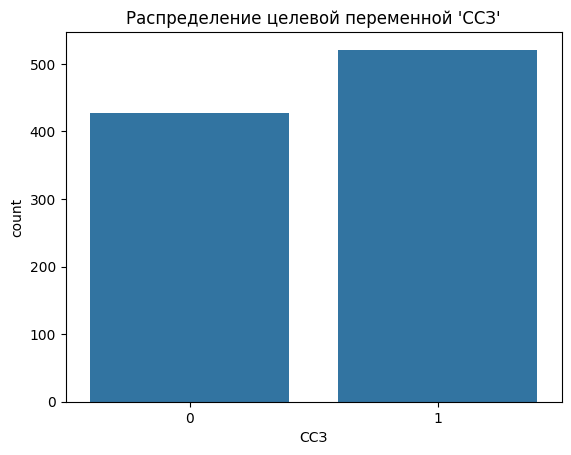

In [ ]:
#проверяем распределение целевого признака
sns.countplot(data=heart_3, x="ССЗ")
plt.title("Распределение целевой переменной 'ССЗ'")
plt.show()

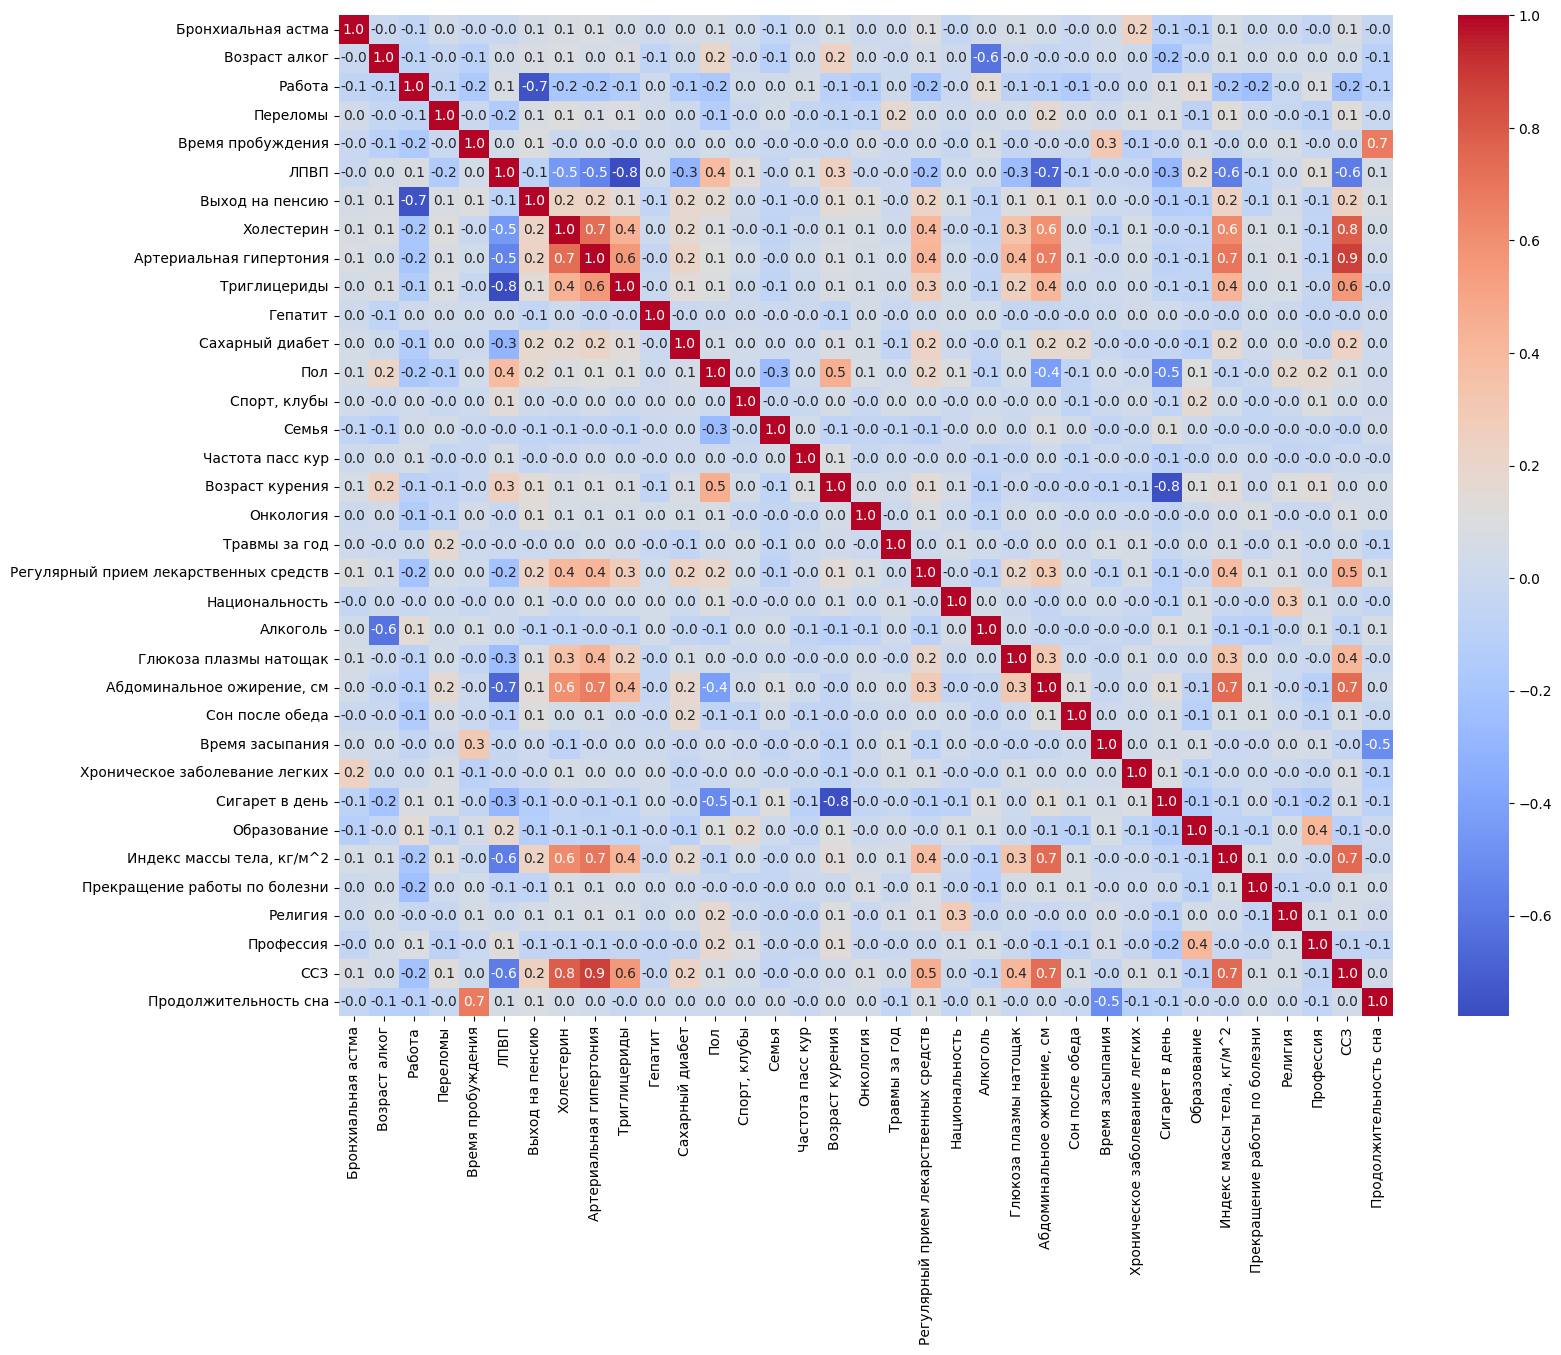

In [ ]:
#проверяем еще раз корреляцию признаков

fig = plt.figure(figsize=(17,13))
sns.heatmap(heart_3.corr(),annot=True,fmt="0.1f",cmap="coolwarm")
plt.show()

**Нулевая гипотеза:**
"Выбранные биохимические и метаболические  признаки НЕ позволяют построить эффективную модель прогнозирования ССЗ"

**Альтернативная гипотеза:**
"Комбинация ключевых медицинских показателей позволяет построить модель, точно прогнозирующую риск сердечно-сосудистых заболеваний"

## Отбор признаков

Необходимо проверить какие ТОП признаки будут выбранны с помощью:

- алгоритма рекурсивного отбора признаков (Recursive Feature Elimination, RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

h = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning/heart3 (1).csv')
h = h.drop(columns=['Unnamed: 0'], errors='ignore')

X = h.drop(columns=['ССЗ'])
y = h['ССЗ']

model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=15)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_].tolist()

print("Отобранные признаки:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

Отобранные признаки:
1. Время пробуждения
2. ЛПВП
3. Холестерин
4. Артериальная гипертония
5. Триглицериды
6. Пол
7. Семья
8. Возраст курения
9. Регулярный прием лекарственных средств
10. Алкоголь
11. Глюкоза плазмы натощак
12. Абдоминальное ожирение, см
13. Сигарет в день
14. Индекс массы тела, кг/м^2
15. Профессия


- функции отбора признаков SelectKBest:

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

h = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning/heart3 (1).csv')
h = h.loc[:, ~h.columns.str.contains('^Unnamed')]

X = h.drop(columns=['ССЗ'])
y = h['ССЗ']

selector = SelectKBest(score_func=f_classif, k=15)
selector.fit(X, y)

selected_features = X.columns[selector.get_support()].tolist()

print("Отобранные признаки:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

Отобранные признаки:
1. Бронхиальная астма
2. Работа
3. Переломы
4. ЛПВП
5. Выход на пенсию
6. Холестерин
7. Артериальная гипертония
8. Триглицериды
9. Сахарный диабет
10. Онкология
11. Регулярный прием лекарственных средств
12. Глюкоза плазмы натощак
13. Абдоминальное ожирение, см
14. Образование
15. Индекс массы тела, кг/м^2


- SelectKBest (f_classif) ищет признаки, которые в среднем сильно различаются между группами ССЗ = 0 и ССЗ = 1.
- RFE + RandomForest ищет признаки, которые в совокупности дают наилучшее предсказание

Выбранные МНОЙ признаки


```
['Холестерин', 'Индекс массы тела, кг/м^2', 'ЛПВП',
 'Глюкоза плазмы натощак', 'Абдоминальное ожирение, см', 'Триглицериды']
```


объединяют ключевые биохимические и метаболические  показатели, результаты которых выявляются только при лабораторных и инструментальных исследованиях и не имеют интерпритации *"со слов пациента"*

## Обучение моделей

Задаем разделение:

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
# указываем целевой признак
y = heart_3['ССЗ']

# выбираем ТОЛЬКО значимые признаки
selected_features = ['Холестерин', 'Индекс массы тела, кг/м^2', 'ЛПВП',
 'Глюкоза плазмы натощак', 'Абдоминальное ожирение, см', 'Триглицериды']

X = heart_3[selected_features]  # только наши 6 лучших признаков

# разделяем данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, # в тестовую выборку 30 %, 70 % - в X_train/y_train.
    random_state=42,  # при каждом запуске одни и те же X_train, X_test, полезно для отладки и сравнения моделей
    stratify=y  # сохраняем пропорции класса больных/здоровых при разбиении
)

### GaussianNaiveBayes выбран потому что он специализируется на бинарной классификации
GaussianNB - базовый уровень, быстрая проверка гипотез

In [ ]:
# обучение модели
sk_nb_clf = GaussianNB()
sk_nb_clf.fit(X_train, y_train)

# предсказания на тестовых данных
sk_nb_clf_pred_res = sk_nb_clf.predict(X_test)

После обучения выводим основные метрики:

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

print("GaussianNB")

# Accuracy - точность, доля правильных ответов из всех данных
accuracy = accuracy_score(y_test, sk_nb_clf_pred_res)
print(f"Accuracy: {accuracy:.3f}")

# Recall - полнота, доля действительно положительных случаев
from sklearn.metrics import recall_score
recall = recall_score(y_test, sk_nb_clf_pred_res)
print(f"Recall: {recall:.3f}")

# F1-MEASURE - баланс между точностью и полнотой
from sklearn.metrics import f1_score
f1 = f1_score(y_test, sk_nb_clf_pred_res)
print(f"F1-мера: {f1:.3f}")

# Precision - тосчность доля действительно положительных диагнозов
from sklearn.metrics import precision_score
precision = precision_score(y_test, sk_nb_clf_pred_res)
print(f"Precision: {precision:.3f}")

# ROC-AUC - насколько хорошо модель разделяет группы
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, sk_nb_clf_pred_res)
print(f"ROC-AUC: {roc_auc:.3f}")

GaussianNB
Accuracy: 0.965
Recall: 0.968
F1-мера: 0.968
Precision: 0.968
ROC-AUC: 0.965


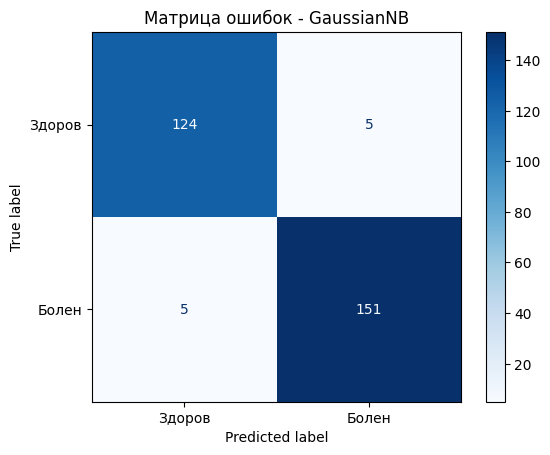

GaussianNB
              precision    recall  f1-score   support

      Здоров       0.96      0.96      0.96       129
       Болен       0.97      0.97      0.97       156

    accuracy                           0.96       285
   macro avg       0.96      0.96      0.96       285
weighted avg       0.96      0.96      0.96       285



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# для GaussianNB
cm_nb = confusion_matrix(y_test, sk_nb_clf_pred_res, labels=[0,1])
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Здоров', 'Болен'])
disp_nb.plot(cmap=plt.cm.Blues, values_format='g')
plt.title('Матрица ошибок - GaussianNB')
plt.show()

print("GaussianNB")
print(classification_report(y_test, sk_nb_clf_pred_res,
                          labels=[0,1],
                          target_names=['Здоров', 'Болен']))

### LogisticRegression выбрана потому что

- Находит линейную границу между классами
- Вычисляет вероятность принадлежности к классу
- Хорошо интерпретируется - можно увидеть вклад каждого признака

In [ ]:
from sklearn.linear_model import LogisticRegression

# ОБУЧЕНИЕ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

In [ ]:
print("LogisticRegression")

log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print(f"Accuracy: {log_reg_accuracy:.3f}")

log_reg_recall = recall_score(y_test, log_reg_pred)
print(f"Recall: {log_reg_recall:.3f}")

log_reg_precision = precision_score(y_test, log_reg_pred)
print(f"Precision: {log_reg_precision:.3f}")

log_reg_f1 = f1_score(y_test, log_reg_pred)
print(f"F1-мера: {log_reg_f1:.3f}")

log_reg_roc_auc = roc_auc_score(y_test, log_reg_pred)
print(f"ROC-AUC: {log_reg_roc_auc:.3f}")

LogisticRegression
Accuracy: 0.982
Recall: 0.968
Precision: 1.000
F1-мера: 0.984
ROC-AUC: 0.984


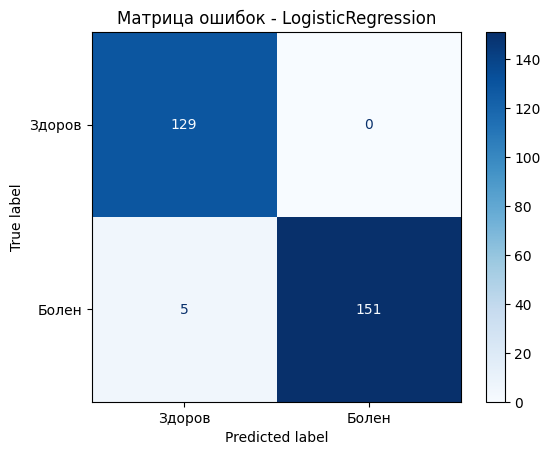

LogisticRegression
              precision    recall  f1-score   support

      Здоров       0.96      1.00      0.98       129
       Болен       1.00      0.97      0.98       156

    accuracy                           0.98       285
   macro avg       0.98      0.98      0.98       285
weighted avg       0.98      0.98      0.98       285



In [ ]:
# для LogisticRegression
cm_lr = confusion_matrix(y_test, log_reg_pred, labels=[0,1])
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Здоров', 'Болен'])
disp_lr.plot(cmap=plt.cm.Blues, values_format='g')
plt.title('Матрица ошибок - LogisticRegression')
plt.show()

print("LogisticRegression")
print(classification_report(y_test, log_reg_pred,
                          labels=[0,1],
                          target_names=['Здоров', 'Болен']))

### RandomForestClassifier - анализ важности признаков

- Он улавливает сложные зависимости — например, когда два признака вместе влияют сильнее, чем по отдельности
- Работает стабильно, даже если классы несбалансированы (один исход встречается реже другого) или в данных есть аномалии
- Показывает, какие признаки важнее, — это помогает не просто предсказывать, но и понимать, на что модель опирается
- Можно использовать как универсальное обоснование для любой бинарной/многоклассовой задачи

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
print("RandomForestClassifier")

rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {rf_accuracy:.3f}")

rf_recall = recall_score(y_test, rf_pred)
print(f"Recall: {rf_recall:.3f}")

rf_precision = precision_score(y_test, rf_pred)
print(f"Precision: {rf_precision:.3f}")

rf_f1 = f1_score(y_test, rf_pred)
print(f"F1-мера: {rf_f1:.3f}")

rf_roc_auc = roc_auc_score(y_test, rf_pred)
print(f"ROC-AUC: {rf_roc_auc:.3f}")

RandomForestClassifier
Accuracy: 0.972
Recall: 0.955
Precision: 0.993
F1-мера: 0.974
ROC-AUC: 0.974


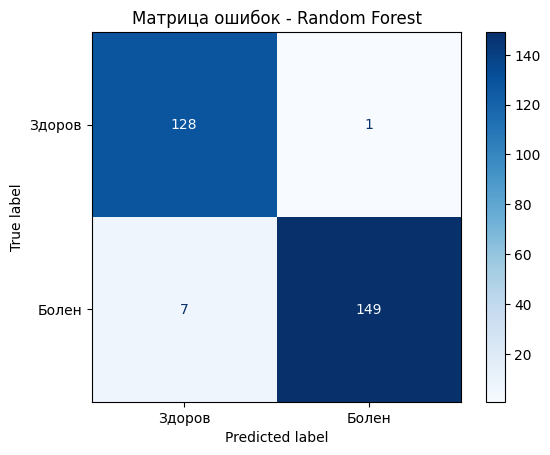

RandomForestClassifier
              precision    recall  f1-score   support

      Здоров       0.95      0.99      0.97       129
       Болен       0.99      0.96      0.97       156

    accuracy                           0.97       285
   macro avg       0.97      0.97      0.97       285
weighted avg       0.97      0.97      0.97       285



In [ ]:
# для RandomForestClassifier
cm_rf = confusion_matrix(y_test, rf_pred, labels=[0,1])
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Здоров', 'Болен'])
disp_rf.plot(cmap=plt.cm.Blues, values_format='g')
plt.title('Матрица ошибок - Random Forest')
plt.show()


print("RandomForestClassifier")
print(classification_report(y_test, rf_pred,
                          labels=[0,1],
                          target_names=['Здоров', 'Болен']))

| Модель                  | Accuracy | Precision | Recall | F1-мера | ROC-AUC |
|-------------------------|----------|-----------|--------|---------|---------|
| **GaussianNB**          | 0.965    | 0.968     | 0.968  | 0.968   | 0.965   |
| **LogisticRegression**  | 0.982    | 1.000     | 0.968  | 0.984   | 0.984   |
| **RandomForestClassifier** | 0.972 | 0.993     | 0.955  | 0.974   | 0.974   |

**Рейтинг моделей по эффективности по итогам обучения:**

**1 место: Logistic Regression**

- Лучшая общая точность (Accuracy = 0.982) среди всех моделей.
- Идеальная точность диагнозов (Precision = 1.000) - модель не делает ложноположительных прогнозов, что может быть критически важно в медицине.
- Высокая полнота (Recall = 0.968) - находит 96.8% всех больных.
- Наилучший баланс между точностью и полнотой (F1-мера = 0.984).
- Отличное разделение классов (ROC-AUC = 0.984).

**2 место: Random Forest Classifier**

- Очень высокие показатели по всем метрикам (Accuracy=0.972, F1=0.974).
- Чрезвычайно высокая точность (Precision=0.993), почти идеальная.
- Немного уступает Logistic Regression по полноте (Recall) и итоговому балансу (F1).

**3 место: Gaussian Naive Bayes**

- Показывает хорошие и сбалансированные результаты (все метрики ~0.965-0.968).
- Однако по всем без исключения метрикам уступает двум другим алгоритмам.

**Ключевой вывод:** Logistic Regression продемонстрировала наивысшее качество классификации на данном тестовом наборе, превзойдя остальные модели по ключевым метрикам Accuracy и F1-мера, а также показав идеальную точность прогноза.

Мы ОТВЕРГАЕМ нулевую гипотезу о том, что выбранных признаков недостаточно для прогнозирования ССЗ, так как моделирование доказало взаимосвязь и готово прогнозировать заданную целевую переменную с исключительно высокой точностью.


## Валидация моделей

### Трехкомпонентное **разделение** данных моделей

GaussianNB, LogisticRegression и RandomForestClassifier

Это нужно для того, чтобы честно оценить способность модели работать на новых, невиданных данных, а не просто запомнить тренировочные примеры.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# --- Подготовка данных (один раз) ---
y = heart_3['ССЗ']
selected_features = [
    'Холестерин', 'Индекс массы тела, кг/м^2', 'ЛПВП',
    'Глюкоза плазмы натощак', 'Абдоминальное ожирение, см', 'Триглицериды'
]
X = heart_3[selected_features]

# Трёхкомпонентное разбиение
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# --- Словарь моделей ---
models = {
    "GaussianNB": GaussianNB(),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42)
}

# --- Вычисление метрик на validation ---
results = []

for name, model in models.items():
    # Обучение
    model.fit(X_train, y_train)

    # Предсказания
    y_pred = model.predict(X_valid)
    y_proba = model.predict_proba(X_valid)[:, 1]  # вероятности класса 1

    # Метрики
    metrics = {
        "Модель": name,
        "Accuracy": accuracy_score(y_valid, y_pred),
        "Recall": recall_score(y_valid, y_pred),
        "Precision": precision_score(y_valid, y_pred),
        "F1": f1_score(y_valid, y_pred),
        "ROC-AUC": roc_auc_score(y_valid, y_proba)
    }
    results.append(metrics)

# --- Вывод таблицы ---
df_results = pd.DataFrame(results)
# Округление до 3 знаков
df_results = df_results.round(3)

print("Сравнение моделей (метрики на трехкомпонентной валидационной выборке):")
print(df_results.to_string(index=False))

Сравнение моделей (метрики на валидационной выборке):
                Модель  Accuracy  Recall  Precision    F1  ROC-AUC
            GaussianNB     0.972   0.987      0.962 0.975    0.999
    LogisticRegression     0.993   0.987      1.000 0.994    0.998
RandomForestClassifier     0.979   0.974      0.987 0.981    0.998


>LogisticRegression демонстрирует наилучшее сочетание точности, надежности и интерпретируемости, что делает ее оптимальным выбором для диагностики ССЗ. Все модели показали отличные результаты, что подтверждает качество отобранных признаков.

### K-Fold Cross-Validation

K-Fold Cross-Validation (Кросс-валидация по K блокам) - это метод, который позволяет более надежно оценить качество модели, используя все данные и для обучения, и для тестирования.

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# --- Подготовка данных ---
y = heart_3['ССЗ']
selected_features = [
    'Холестерин', 'Индекс массы тела, кг/м^2', 'ЛПВП',
    'Глюкоза плазмы натощак', 'Абдоминальное ожирение, см', 'Триглицериды'
]
X = heart_3[selected_features]

# --- Настройка кросс-валидации ---
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# --- Словарь моделей ---
models = {
    "GaussianNB": GaussianNB(),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42)
}

# --- Запуск кросс-валидации и сбор результатов ---
results = []

for name, model in models.items():
    cv_res = cross_validate(
        estimator=model,
        X=X, y=y,
        cv=kfold,
        scoring=scoring,
        n_jobs=-1
    )

    # Средние значения по фолдам
    results.append({
        "Модель": name,
        "Accuracy": cv_res['test_accuracy'].mean(),
        "Precision": cv_res['test_precision'].mean(),
        "Recall": cv_res['test_recall'].mean(),
        "F1": cv_res['test_f1'].mean(),
        "ROC-AUC": cv_res['test_roc_auc'].mean()
    })

# --- Вывод таблицы со средними метриками ---
df = pd.DataFrame(results).round(3)
print("Сравнение моделей (5-фолдная стратифицированная кросс-валидация):")
print(df.to_string(index=False))

Сравнение моделей (5-фолдная стратифицированная кросс-валидация):
                Модель  Accuracy  Precision  Recall    F1  ROC-AUC
            GaussianNB     0.967      0.979   0.962 0.970    0.993
    LogisticRegression     0.970      0.985   0.962 0.973    0.994
RandomForestClassifier     0.977      0.992   0.965 0.978    0.992



- Все метрики колеблются в узком диапазоне (±0.01-0.02)
- Нет резких провалов в каком-то фолде
- K-Fold дал более надежное подтверждение, что модели действительно качественные и стабильные


ВЫВОД  
Самая важная метрика для медицинской диагностики - F1-мера так как это:

- Баланс между Precision (точность диагноза) и Recall (нахождение всех больных)

- Идеально для задач, где важны и ложноположительные, и ложноотрицательные

- В медицине одинаково опасно и пропустить болезнь, и поставить ложный диагноз

Наиболее годной и предпочтительной моделью является Logistic Regression — она сочетает максимальную полноту, лучший баланс ошибок и высокую интерпретируемость, что делает её оптимальным выбором для медицинской предиктивной задачи.

## Настройка гиперпараметров


LogisticRegression по F1

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# --- Подготовка данных (ваш отбор признаков) ---
y = heart_3['ССЗ']
selected_features = [
    'Холестерин', 'Индекс массы тела, кг/м^2', 'ЛПВП',
    'Глюкоза плазмы натощак', 'Абдоминальное ожирение, см', 'Триглицериды'
]
X = heart_3[selected_features]

# Разделение: 80% train+val, 20% test (test — только для финальной оценки "до/после")
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Кросс-валидация (только на train_val)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- 1. Оценка ДО оптимизации ---
model_before = LogisticRegression(random_state=42, max_iter=1000)
model_before.fit(X_train_val, y_train_val)
f1_before = f1_score(y_test, model_before.predict(X_test))

# --- 2. Оптимизация гиперпараметров ---
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=2000),
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1
)
grid_search.fit(X_train_val, y_train_val)

# --- 3. Оценка ПОСЛЕ оптимизации ---
best_model = grid_search.best_estimator_
f1_after = f1_score(y_test, best_model.predict(X_test))

# --- Вывод результата ---
print("=== LogisticRegression: Оптимизация гиперпараметров ===")
print(f"F1 до оптимизации:  {f1_before:.4f}")
print(f"F1 после:           {f1_after:.4f} (+{(f1_after - f1_before):+.4f})")
print(f"Лучшие параметры:   {grid_search.best_params_}")

=== LogisticRegression: Оптимизация гиперпараметров ===
F1 до оптимизации:  0.9854
F1 после:           0.9854 (++0.0000)
Лучшие параметры:   {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# --- Подготовка данных (ваш отбор признаков) ---
y = heart_3['ССЗ']
selected_features = [
    'Холестерин', 'Индекс массы тела, кг/м^2', 'ЛПВП',
    'Глюкоза плазмы натощак', 'Абдоминальное ожирение, см', 'Триглицериды'
]
X = heart_3[selected_features]

# Разделение: 80% train+val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- 1. Оценка ДО оптимизации ---
model_before = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_before.fit(X_train_val, y_train_val)
f1_before = f1_score(y_test, model_before.predict(X_test))

# --- 2. Оптимизация гиперпараметров ---
# Упрощённая сетка для ускорения (можно расширить)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1
)
grid_search.fit(X_train_val, y_train_val)

# --- 3. Оценка ПОСЛЕ оптимизации ---
best_model = grid_search.best_estimator_
f1_after = f1_score(y_test, best_model.predict(X_test))

# --- Вывод результата ---
print("=== RandomForestClassifier: Оптимизация гиперпараметров ===")
print(f"F1 до оптимизации:  {f1_before:.4f}")
print(f"F1 после:           {f1_after:.4f} (+{(f1_after - f1_before):+.4f})")
print(f"Лучшие параметры:   {grid_search.best_params_}")

=== RandomForestClassifier: Оптимизация гиперпараметров ===
F1 до оптимизации:  0.9806
F1 после:           0.9806 (++0.0000)
Лучшие параметры:   {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}


## Вывод

Лучшей моделью является LogisticRegression, поскольку она достигает наивысшей F1-меры (0.9854), что является важным для медицинской интепритации

Оптимизация гиперпараметров не улучшила F1-меру (≈0.98), что свидетельствует: модель на 6 ключевых метаболических признаках уже достигла предела предсказательной способности для данной задачи. Это подтверждает как высокую информативность выбранных показателей, так и готовность простой интерпретируемой модели (LogisticRegression) к практическому использованию в скрининге ССЗ.